<div style="text-align: center;">
    <h1>Find music similarity with:</h1>
</div>

<div style="text-align: center;">
    <h2>Clustering songs (using KMeans) & Unsupervised Learning (using PCA)</h2>
</div>


In [44]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.utils import shuffle

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# K-nn modelling
from sklearn.neighbors import NearestNeighbors

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots your sample against a Normal distribution, 
# to see whether your sample is normally distributed or not

## Spotify Dataset Inspection

In [45]:
spotify = shuffle(pd.read_csv('../raw_data/full_data.csv', index_col=0))
spotify.tail()

,uri,name,artists,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,sp10,sp11,sp12,tm1,tm2,tm3,tm4,tm5,tm6,tm7,tm8,tm9,tm10,tm11,tm12
48376,spotify:track:5I45HC0bUKUxQjYwFXkQBz,Return to the Abyss,Suffocation,32.0,0.0,0.536,0.988,9.0,-4.036,1.0,0.1410,0.001380,0.795000,0.1410,0.238,105.019,0.629711,0.734467,0.536148,0.491412,0.459778,0.429369,0.407813,0.402345,0.518972,0.511085,0.491666,0.488978,53.138578,92.525687,-16.336879,-27.433609,-16.173906,-25.804540,-16.635881,-3.480011,-9.612635,3.793951,-8.211700,7.350686
24843,spotify:track:3JOnabEkmuuDM608I4vyXM,Will The Circle Be Unbroken,Jimmy Martin,17.0,0.0,0.598,0.421,5.0,-13.210,1.0,0.0313,0.379000,0.000002,0.5260,0.687,114.857,0.473413,0.280307,0.260986,0.184068,0.239637,0.381386,0.243095,0.387575,0.231851,0.336925,0.482524,0.260184,42.883214,83.752525,68.725212,13.185616,24.724637,-18.485467,2.668356,10.269141,-0.863051,4.016060,-7.708585,-5.601862
46217,spotify:track:1izfiChi4WU4EVXhhRtbcR,Scared Together,Silversun Pickups,48.0,0.0,0.579,0.920,2.0,-4.959,1.0,0.0694,0.000393,0.002740,0.0864,0.437,79.015,0.509783,0.609868,0.413115,0.334398,0.549699,0.525112,0.417393,0.461555,0.370235,0.481538,0.277153,0.238297,51.217400,45.007904,-14.426387,-2.366588,14.687949,-34.784587,-4.687798,-4.454418,4.752143,6.264510,-3.840325,-6.332879
25543,spotify:track:6iQ0OIxisPxhzEICEXtaWS,I'm In The Mood,John Lee Hooker,54.0,0.0,0.601,0.190,5.0,-18.675,1.0,0.0610,0.507000,0.000055,0.1800,0.656,202.294,0.447491,0.301898,0.263462,0.113960,0.136511,0.251231,0.269455,0.685376,0.224339,0.175892,0.258746,0.252096,35.018262,11.714108,-25.470285,16.326923,26.131561,2.866965,-11.289428,1.695709,-6.007062,-0.107067,-16.420761,2.442339
7127,spotify:track:3IlY76VbP31zwPY0S2EMjh,The Quiet Things That No One Ever Knows,Brand New,60.0,0.0,0.202,0.797,6.0,-5.809,1.0,0.0729,0.016300,0.000004,0.0986,0.246,80.284,0.379683,0.590475,0.233694,0.333141,0.224376,0.290067,0.508679,0.214032,0.207434,0.173114,0.326654,0.396162,50.793961,35.899713,4.058813,-12.855208,13.818346,-30.311241,0.875453,4.814984,-2.258313,2.547720,-9.861841,1.350312


### Info

In [46]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59472 entries, 16507 to 7127
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               59472 non-null  object 
 1   name              59472 non-null  object 
 2   artists           59472 non-null  object 
 3   popularity        59472 non-null  float64
 4   explicit          59472 non-null  float64
 5   danceability      59472 non-null  float64
 6   energy            59472 non-null  float64
 7   key               59472 non-null  float64
 8   loudness          59472 non-null  float64
 9   mode              59472 non-null  float64
 10  speechiness       59472 non-null  float64
 11  acousticness      59472 non-null  float64
 12  instrumentalness  59472 non-null  float64
 13  liveness          59472 non-null  float64
 14  valence           59472 non-null  float64
 15  tempo             59472 non-null  float64
 16  sp1               59472 non-null  flo

### Working on the numerical features

### MinMax Scaling & OHE

Scale and encode the numerical features in the *spotify_num* DataFrame.

KMeans need scaled values to correctly compare features of different dimension.

In [47]:
categorical_features = ['key']
# Numerical columns
numeric_features = ['acousticness',
                    'energy',
                    'instrumentalness',
                    'valence',
                    'tempo',
                    'mode',
                    'danceability',
                    'sp1',
                    'sp2', 'sp3', 'sp4', 'sp5',
                    'sp6', 'sp7', 'sp8', 'sp9',
                    'sp10', 'sp11', 'sp12', 'tm1',
                    'tm2', 'tm3', 'tm4', 'tm5',
                    'tm6', 'tm7', 'tm8', 'tm9',
                    'tm10', 'tm11', 'tm12']
string_features = ['name', 'artists']
# Categorical transformer
categorical_transformer = Pipeline(steps=[(
    'onehot', OneHotEncoder(handle_unknown='ignore'))])
# Numerical transformer
numeric_transformer = Pipeline(steps=[(
    'scaler', MinMaxScaler())])
# String transformer
string_transformer = Pipeline(steps=[(
    'pass', 'passthrough')])
# Transformer
transformer = ColumnTransformer(
    transformers=[
        ('', string_transformer, string_features),
        ('minmax', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit and transform data
X_mmscaled = transformer.fit_transform(spotify)
# Transform np.array to dataset
spotify_num = pd.DataFrame(X_mmscaled, 
                columns=transformer.get_feature_names_out())

### Reduce distance in space for categorical features and PCA

In [48]:
cat_columns = ['cat__key_0.0', 'cat__key_1.0', 'cat__key_2.0',
       'cat__key_3.0', 'cat__key_4.0', 'cat__key_5.0', 'cat__key_6.0',
       'cat__key_7.0', 'cat__key_8.0', 'cat__key_9.0', 'cat__key_10.0',
       'cat__key_11.0', 'minmax__mode'
       ]

for c in cat_columns:
   spotify_num[c] = spotify_num[c] * 0.5

spotify_num_tensorboard = spotify_num.copy()
spotify_num_tensorboard['name'] = spotify_num_tensorboard['__name'] + ' - ' + spotify_num_tensorboard['__artists']

spotify_num_tensorboard['name'] = spotify_num_tensorboard['name'].apply(lambda x: str(x).replace("['", ''))
spotify_num_tensorboard['name'] = spotify_num_tensorboard['name'].apply(lambda x: str(x).replace("']", ''))

spotify_num_tensorboard.drop(columns=['__name', '__artists'], inplace=True)
spotify_num.drop(columns=['__name', '__artists'], inplace=True)

spotify_num = spotify_num.astype(float)

### Check Correlations between features

#### With this levels of correlations we can keep all the features to implement our app

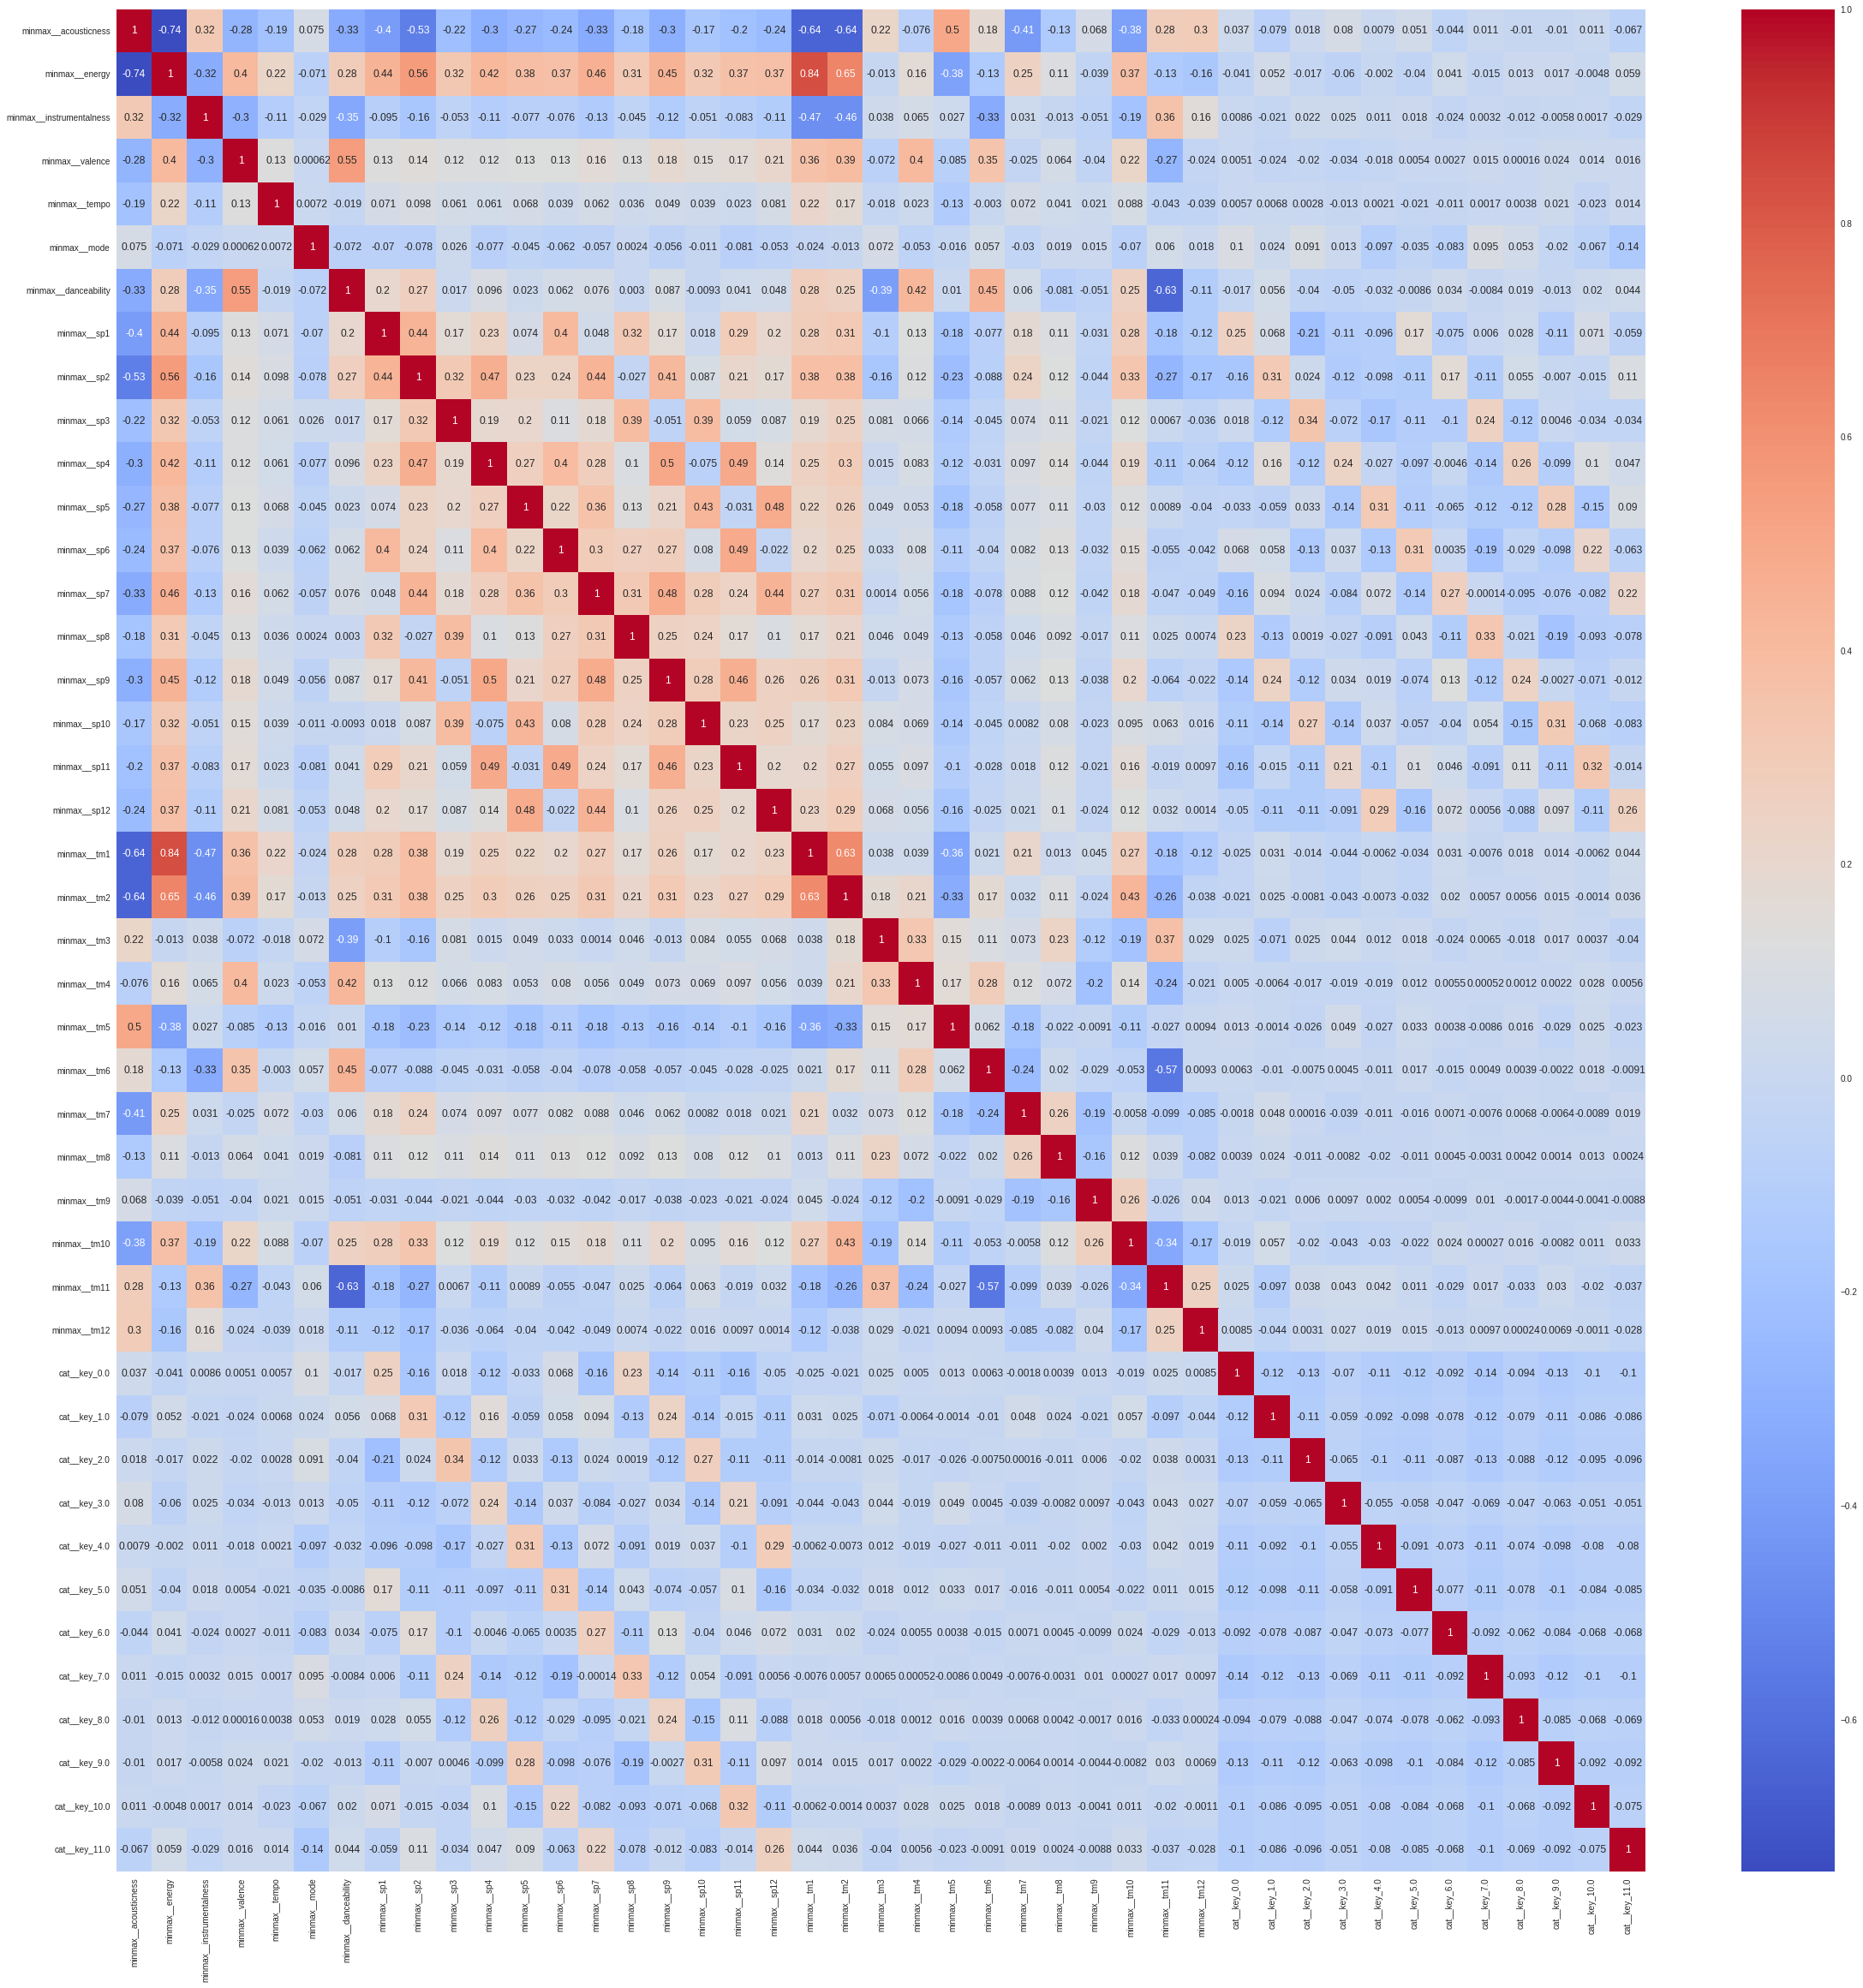

In [49]:
plt.figure(figsize=(40,40))

sns.heatmap(spotify_num.corr(),
            annot = True,
            annot_kws = {"fontsize":12},
            cmap='coolwarm');

### 3D Visualisation

Selecting 3 features of these songs and visualise them in a 3D-scatter-plot using *plotly*

In [50]:
fig = px.scatter_3d(spotify_num, 
                    x = 'minmax__instrumentalness',
                    y = 'minmax__acousticness',
                    z = 'minmax__tm1',
                    opacity=0.7, width=900, height=900
           )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Unsupervised Learning: Clustering

### MinMax Scaling & OHE + Vanilla KMeans

Creation of a baseline _Unsupervised Algorithm_ on *spotify_num* and 7 clusters. Then storing the predicted labels in *labels_vanilla*

In [51]:
kmeans_vanilla = KMeans(n_clusters = 7)
kmeans_vanilla.fit(spotify_num)
 
labels_vanilla = kmeans_vanilla.labels_
labels_vanilla

array([6, 3, 5, ..., 1, 0, 5], dtype=int32)

### Print a 3D plot with only 3 dimensions (instrumentalness, acousticness and timbre 1) with different colors representing the different cluster of appartenance

In [52]:
fig = px.scatter_3d(spotify_num, 
                    x = 'minmax__instrumentalness',
                    y = 'minmax__acousticness',
                    z = 'minmax__tm1',
                    color = labels_vanilla, width=900, height=900)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### MinMax Scaling & OHE + PCA + Vanilla KMeans

PCA permits to:
* reduce dimensionality to get a better visual feedback on our clustering
* use the orthogonality of the principal components so that the KMeans algorithm increases its clustering power

Fit a PCA and reduce the dimensionality appropriately using the elbow method:

In [53]:
pca = PCA()
pca.fit(spotify_num) # find all the Principal Components PC (no y!)

PCA()

In [54]:
spotify_num.shape

(59472, 43)

Project $ 59472 \times 43$ *spotify_num_scaled* dataset into the new space with the number of principal components we decided to keep (3). Naming it *spotify_proj*

In [55]:
threhsold_pca = 3
pca = PCA(n_components=threhsold_pca, whiten=True)
pca.fit(spotify_num)
spotify_proj = pd.DataFrame(pca.transform(spotify_num))

### Print the new dataset, composed of only 3 principal components

In [56]:
fig_scaled = px.scatter_3d(spotify_proj, 
                           x = 0, 
                           y = 1, 
                           z = 2, 
                           opacity=0.7, 
                           width=900, 
                           height=900)
fig_scaled.show()

Output hidden; open in https://colab.research.google.com to view.

KMeans saving the labels into *labels_kmeans_pca*

In [57]:
kmeans_pca = KMeans(n_clusters = 7)
kmeans_pca.fit(spotify_proj)

KMeans(n_clusters=7)

In [58]:
labels_kmeans_pca = kmeans_pca.labels_
labels_kmeans_pca

array([5, 1, 5, ..., 0, 3, 0], dtype=int32)

In [59]:
fig_scaled = px.scatter_3d(spotify_num,
                        x = 'minmax__instrumentalness',
                        y = 'minmax__acousticness',
                        z = 'minmax__tm1',
                        color = labels_kmeans_pca,
                        width=900, height=900)
fig_scaled.show()

Output hidden; open in https://colab.research.google.com to view.

### Finding the ideal number of clusters

### YellowBricks and Elbow Method

Finding the Elbow of the KMeans algorithm on Spotify using the ***KElbowVisualizer***

In [60]:
from yellowbrick.cluster import KElbowVisualizer

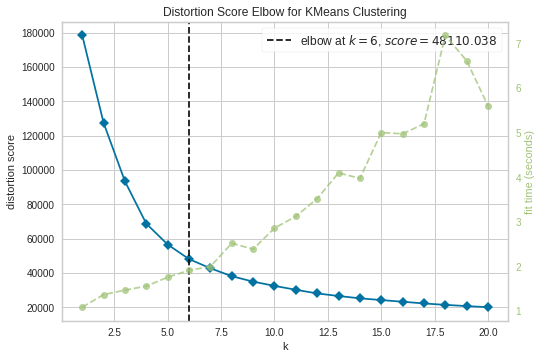

In [61]:
if 'kmeans' in globals():
  del kmeans
  del elbow_visualizer
kmeans = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans,  k=(1,21))
elbow_visualizer.fit(spotify_proj)
elbow_visualizer.show();

### Imitating Spotify 6 daily mixes

The best number of cluster automatically computed is 6, so let's imitate a  Spotify 6 daily mixes on the 3 PCA dataset

In [62]:
spotify_clusters = 6

print('Working with ' + str(spotify_clusters) + ' clusters as in Spotify', flush=True)
print("-"*80)

kmeans = KMeans(n_clusters = spotify_clusters, max_iter = 300)

kmeans.fit(spotify_proj)

labelling = kmeans.labels_

fig_scaled = px.scatter_3d(spotify_proj,
                           x = 0,
                           y = 1,
                           z = 2,
                           color=labelling, 
                           width=900, 
                           height=900)
fig_scaled.show()

Output hidden; open in https://colab.research.google.com to view.

### Inspect the labelling result

In [63]:
spotify_labelled = spotify_num_tensorboard.copy()
spotify_labelled['label'] = pd.Series(labelling)

In [64]:
np.unique(labelling)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [65]:
spotify_labelled.label.value_counts()

1    16441
5    13830
4    10205
3     9743
2     5417
0     3836
Name: label, dtype: int64

## Now we can extract the centres of 6 clusters for the PCA dataset and the original 43 features dataset, to compare the 2 different models

In [67]:
pd.options.mode.chained_assignment = None  # default='warn'

centers_vanilla = np.array(kmeans_vanilla.cluster_centers_)
centers_kmeans = np.array(kmeans.cluster_centers_)

n_model_s_va=NearestNeighbors(n_neighbors=5).fit(spotify_num)
n_model_s_km=NearestNeighbors(n_neighbors=5).fit(spotify_proj)

# Original 43 features dataset 6 daily mixes:

In [68]:
for c in centers_vanilla:
    distance, index=n_model_s_va.kneighbors(c.reshape(1, -1),n_neighbors=3)
    playlist_va = spotify_num_tensorboard.iloc[index[0],:]
    playlist_va['distance'] = distance[0]
    display(playlist_va.sort_values(by=['distance'], ascending=True)[['name', 'distance']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,distance
24290,Flight of the Foo Birds - Count Basie,0.519020
43333,Cuando Te Acuerdes De Mi (En Vivo) - Luis R Co...,0.521673
16284,"We'll Go from There - Christy Altomare, Derek ...",0.525181


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,distance
44473,Mi Nena - Live - Little Joe & La Familia,0.508351
35820,The Way You Love Me - Faith Hill,0.513028
51969,Physical - Dua Lipa,0.513543


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,distance
57885,Gana El Hawa - Abdel Halim Hafez,0.522527
24605,That's All - Kenny Rankin,0.524793
35092,Santa Fe - Jeremy Jordan,0.526204


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,distance
17984,Some Other Spring - Roy Haynes Quartet,0.545199
22760,"Symphony No. 9 in C Major, D. 944 ""The Great"":...",0.559501
37030,Time Release: II. Playful Turbulence - Slow/Fa...,0.559665


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,distance
12194,Eres Todopoderoso - Danilo Montero,0.526823
6606,The Real Thing - Lisa Stansfield,0.532063
2211,"WATER. (feat. Bryce Vine) - Snakehips, Bryce Vine",0.533658


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,distance
18320,(You Make Me Feel Like A) Natural Woman - Jenn...,0.519580
20553,Skin and Bones - 070 Shake,0.525728
404,Missing You Now (feat. Kenny G) - Michael Bolt...,0.530477


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,name,distance
16215,イエロー・マジック (東風) - YELLOW MAGIC ORCHESTRA,0.575753
37166,"After Midnight - Live - Jerry Garcia Band, Jer...",0.580303
20606,Livin' Large - Euge Groove,0.610991


# PCA 3 features dataset 6 daily mixes:

In [69]:
for c in centers_kmeans:
    distance, index=n_model_s_km.kneighbors(c.reshape(1, -1),n_neighbors=3)
    playlist_km = spotify_num_tensorboard.iloc[index[0],:]
    playlist_km['distance'] = distance[0]
    display(playlist_km.sort_values(by=['distance'], ascending=True)[['name', 'distance']])

,name,distance
15356,Digital Love - Daft Punk,0.074621
44422,I Ain't Goin' Out Like That - Cypress Hill,0.085300
36858,25 O'Clock - 2001 Mix - The Dukes Of Stratosphear,0.112795


,name,distance
24534,JUGG - Swavay,0.027028
21475,Pablo Picasso - The Modern Lovers,0.037733
11780,Sunday Bloody Sunday - Remastered 2008 - U2,0.060357


,name,distance
44073,Introduction and Rondo capriccioso in A Minor ...,0.054369
50328,"Polonaise No. 6 in A-Flat Major, Op. 53 ""Heroi...",0.064403
17915,It Might As Well Be Spring - Bill Evans Trio,0.072638


,name,distance
10715,Barefoot And Pregnant - Joan Armatrading,0.045340
414,Jazz (We've Got) - A Tribe Called Quest,0.074067
53610,Soledad - The Chakachas,0.079787


,name,distance
19455,"Canastera - Camaron De La Isla, Paco de Lucía",0.037535
17165,I'm Tired - Where Am I - Savoy Brown,0.055663
43341,海闊天空 - Beyond,0.059814


,name,distance
13888,War - King Von,0.052831
13680,Sample in a Jar - Phish,0.061253
49599,Mad About You - Belinda Carlisle,0.084363


### Pipeling the labelling process

Wrap the three steps Scaling, PCA and KMeans in one pipeline called *pipeline_spotify*. Fit it and store the predicted labels into a variable called *labels*

In [70]:
pipeline_spotify = make_pipeline(
    PCA(n_components=3),
    KMeans(n_clusters=6)
)
pipeline_spotify

Pipeline(steps=[('pca', PCA(n_components=3)), ('kmeans', KMeans(n_clusters=6))])

In [71]:
pipeline_spotify.fit(spotify_num)
labels = pipeline_spotify.predict(spotify_num)

In [72]:
fig = px.scatter_3d(spotify_proj,
                           x = 0, 
                           y = 1,
                           z = 2,
                           color = labels)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Tensorflow Projector 

You can use [projector.tensorflow.org](https://projector.tensorflow.org/) to visualize your data in nicer 3D plots
It also allows you to try several other clustering techniques, such as
- PCA
- T-SNE
- UMAP

In [73]:
# To upload data, convert them first as tsv format, then click on "load" directly from the website
spotify_num.head(3000).to_csv('../raw_data/tp_full_data.csv', index=False, header=False, sep='\t')
spotify_num_tensorboard.head(3000)['name'].to_csv('../raw_data/tp_full_data_labels.csv', index=False, header=False, sep='\t')

Upload the spotify dataset and vizualize the **PCA** and the **UMAP** version. 
- Also upload your "custom labels" determined previously, and "color by labels".

# Music Recommender 

### Seen the results of daily mix replica, we decided to keep the original 43 features instead of the reduced PCA dataset.

In [74]:
df = spotify_num.copy()

In [75]:
index_queen = spotify_num_tensorboard[spotify_num_tensorboard['name'] == 'Another One Bites The Dust - Remastered 2011 - Queen'].index[0]

#### Let's find songs that are "similar" to Queen's mythical Another One Bites the Dust.

In [76]:
queen_song = df.iloc[index_queen:index_queen + 1] #
queen_song

,minmax__acousticness,minmax__energy,minmax__instrumentalness,minmax__valence,minmax__tempo,minmax__mode,minmax__danceability,minmax__sp1,minmax__sp2,minmax__sp3,minmax__sp4,minmax__sp5,minmax__sp6,minmax__sp7,minmax__sp8,minmax__sp9,minmax__sp10,minmax__sp11,minmax__sp12,minmax__tm1,minmax__tm2,minmax__tm3,minmax__tm4,minmax__tm5,minmax__tm6,minmax__tm7,minmax__tm8,minmax__tm9,minmax__tm10,minmax__tm11,minmax__tm12,cat__key_0.0,cat__key_1.0,cat__key_2.0,cat__key_3.0,cat__key_4.0,cat__key_5.0,cat__key_6.0,cat__key_7.0,cat__key_8.0,cat__key_9.0,cat__key_10.0,cat__key_11.0
48744,0.11245,0.527991,0.329,0.756,0.444636,0.0,0.947208,0.676397,0.460554,0.336189,0.41579,0.427866,0.517497,0.362347,0.419273,0.490112,0.421547,0.399468,0.591874,0.710515,0.519726,0.371631,0.445513,0.331173,0.546244,0.430827,0.446184,0.412753,0.523307,0.723603,0.623274,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


Let's find the 16 nearest songs to the one selected:

In [77]:
n_model_s=NearestNeighbors(n_neighbors=16, algorithm='brute').fit(df)

In [78]:
distance, index=n_model_s.kneighbors(queen_song,n_neighbors=16)
playlist = spotify_num_tensorboard.iloc[index[0],:]
playlist['distance'] = distance[0]
playlist.sort_values(by=['distance'], ascending=True)[['name', 'distance']]

,name,distance
48744,Another One Bites The Dust - Remastered 2011 -...,0.000000
57666,"I'm In Love - Evelyn ""Champagne"" King",0.487320
12026,"Street Talkin' - Slick Rick, Outkast",0.535573
50970,The Only One (feat. Angela Johnson) - Extended...,0.536865
14414,Cola Bottle Baby - Edwin Birdsong,0.537132
23173,Thank You - Landa Feat. Jazze PHA,0.546182
22979,"Mister Magic - Grover Washington, Jr.",0.558073
21184,"We Ride (feat. Cam'ron, Noreaga, Jay-Z & Vegas...",0.565918
55144,"Ambrse - Matthew ""Mdot"" Finley, William the Ba...",0.571955
53000,Autumn Eyes - Edwin Birdsong,0.585797
